In [13]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
import sweetviz

In [14]:
#READING
master=pd.read_csv('D:/R/IBM/mas.csv')
master.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
#CHECK COLUMN NAMES
print(master.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [16]:
#Check Dtypes
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
# Check NA
master.isnull().sum()/len(master)*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

# EDA#

In [21]:
myrep=sweetviz.analyze(master,target_feat="Attrition")



                                   |                         | [  0%]   00:00  -> (? left)

Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)

:TARGET::                          |▌                    | [  3%]   00:00  -> (00:00 left)

:TARGET::                          |█▏                   | [  6%]   00:00  -> (00:01 left)

:Age:                              |█▏                   | [  6%]   00:00  -> (00:01 left)

:Age:                              |█▊                   | [  8%]   00:00  -> (00:04 left)

:BusinessTravel:                   |█▊                   | [  8%]   00:00  -> (00:04 left)

:BusinessTravel:                   |██▎                  | [ 11%]   00:00  -> (00:04 left)

:DailyRate:                        |██▎                  | [ 11%]   00:00  -> (00:04 left)

:DailyRate:                        |██▉                  | [ 14%]   00:00  -> (00:05 left)

:Department:                       |██▉                  | [ 14%]   00:00  -> 

Creating Associations graph... DONE!


In [23]:
myrep.show_html('Vis.html')

# ANALYZE WITH TARGET VARIABLES#

In [25]:
myrep1=sweetviz.compare_intra(master,master['Attrition']=="No",['NO','YES'])
myrep1.show_html('Viss.html')



                                   |                         | [  0%]   00:00  -> (? left)

Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)

:Age:                              |█▏                   | [  6%]   00:00  -> (00:00 left)

:Age:                              |█▊                   | [  8%]   00:00  -> (00:04 left)

:Attrition:                        |█▊                   | [  8%]   00:00  -> (00:04 left)

:Attrition:                        |██▎                  | [ 11%]   00:00  -> (00:04 left)

:BusinessTravel:                   |██▎                  | [ 11%]   00:00  -> (00:04 left)

:BusinessTravel:                   |██▉                  | [ 14%]   00:00  -> (00:03 left)

:DailyRate:                        |██▉                  | [ 14%]   00:00  -> (00:03 left)

:DailyRate:                        |███▌                 | [ 17%]   00:01  -> (00:05 left)

:Department:                       |███▌                 | [ 17%]   00:01  -> 

Creating Associations graph... DONE!


# FEATURE ENGINEERING#

In [23]:
master['Employment_Stability']=master['YearsInCurrentRole'] / master['YearsAtCompany']
master['Employee_to_Manager_Stability']=master['YearsWithCurrManager'] / master['YearsAtCompany']
master['Fedility']=master['NumCompaniesWorked'] / master['TotalWorkingYears']
master['Income_YearsComp'] = master['MonthlyIncome'] / master['YearsAtCompany']
master['Start_at']=master['Age'] - master['TotalWorkingYears']
master['JobSatisf_mean'] = (master['JobSatisfaction'] + master['JobInvolvement']) / 2
master['TotalSatisfaction_mean'] = (master['RelationshipSatisfaction']  + master['EnvironmentSatisfaction'] + master['JobSatisfaction'] + master['JobInvolvement'] + master['WorkLifeBalance'])/5
master['Hrate_Mrate'] = master['HourlyRate'] / master['MonthlyRate']
master['Rating']=master['PercentSalaryHike'] / master['PerformanceRating']


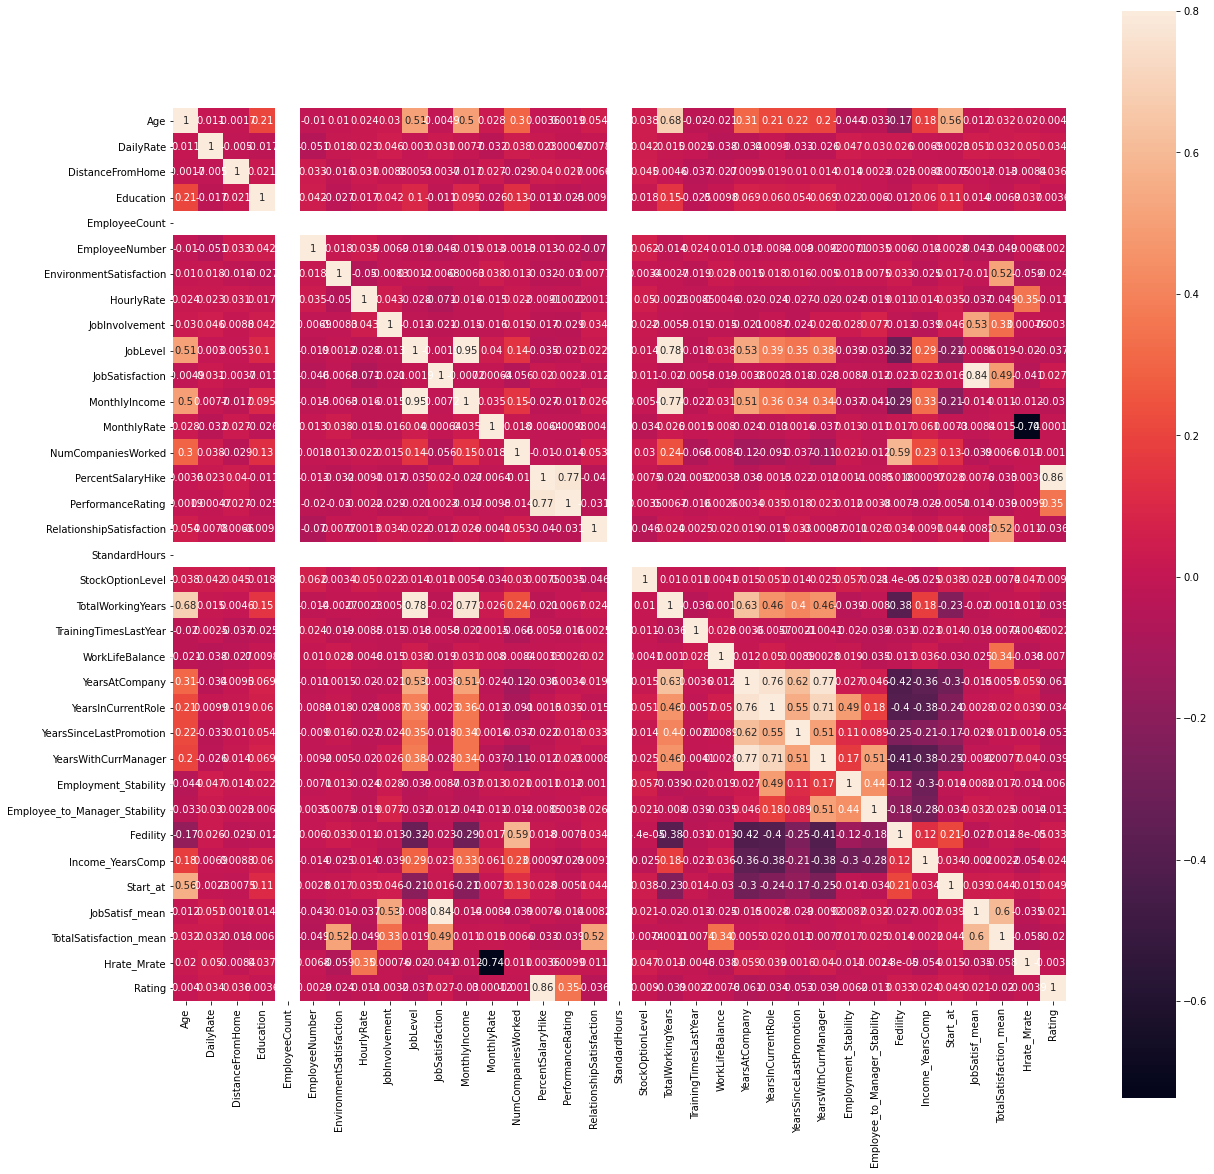

In [24]:
#####CORRELATION MATRIX######
corrmat = master.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

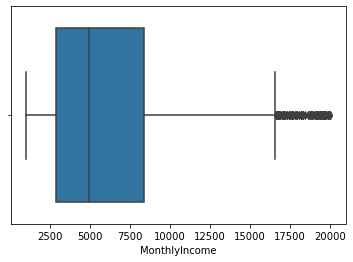

In [25]:
sns.boxplot(master['MonthlyIncome'])

In [26]:
nueric=master.dtypes[master.dtypes !='object'].index
print(nueric)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Employment_Stability', 'Employee_to_Manager_Stability', 'Fedility',
       'Income_YearsComp', 'Start_at', 'JobSatisf_mean',
       'TotalSatisfaction_mean', 'Hrate_Mrate', 'Rating'],
      dtype='object')


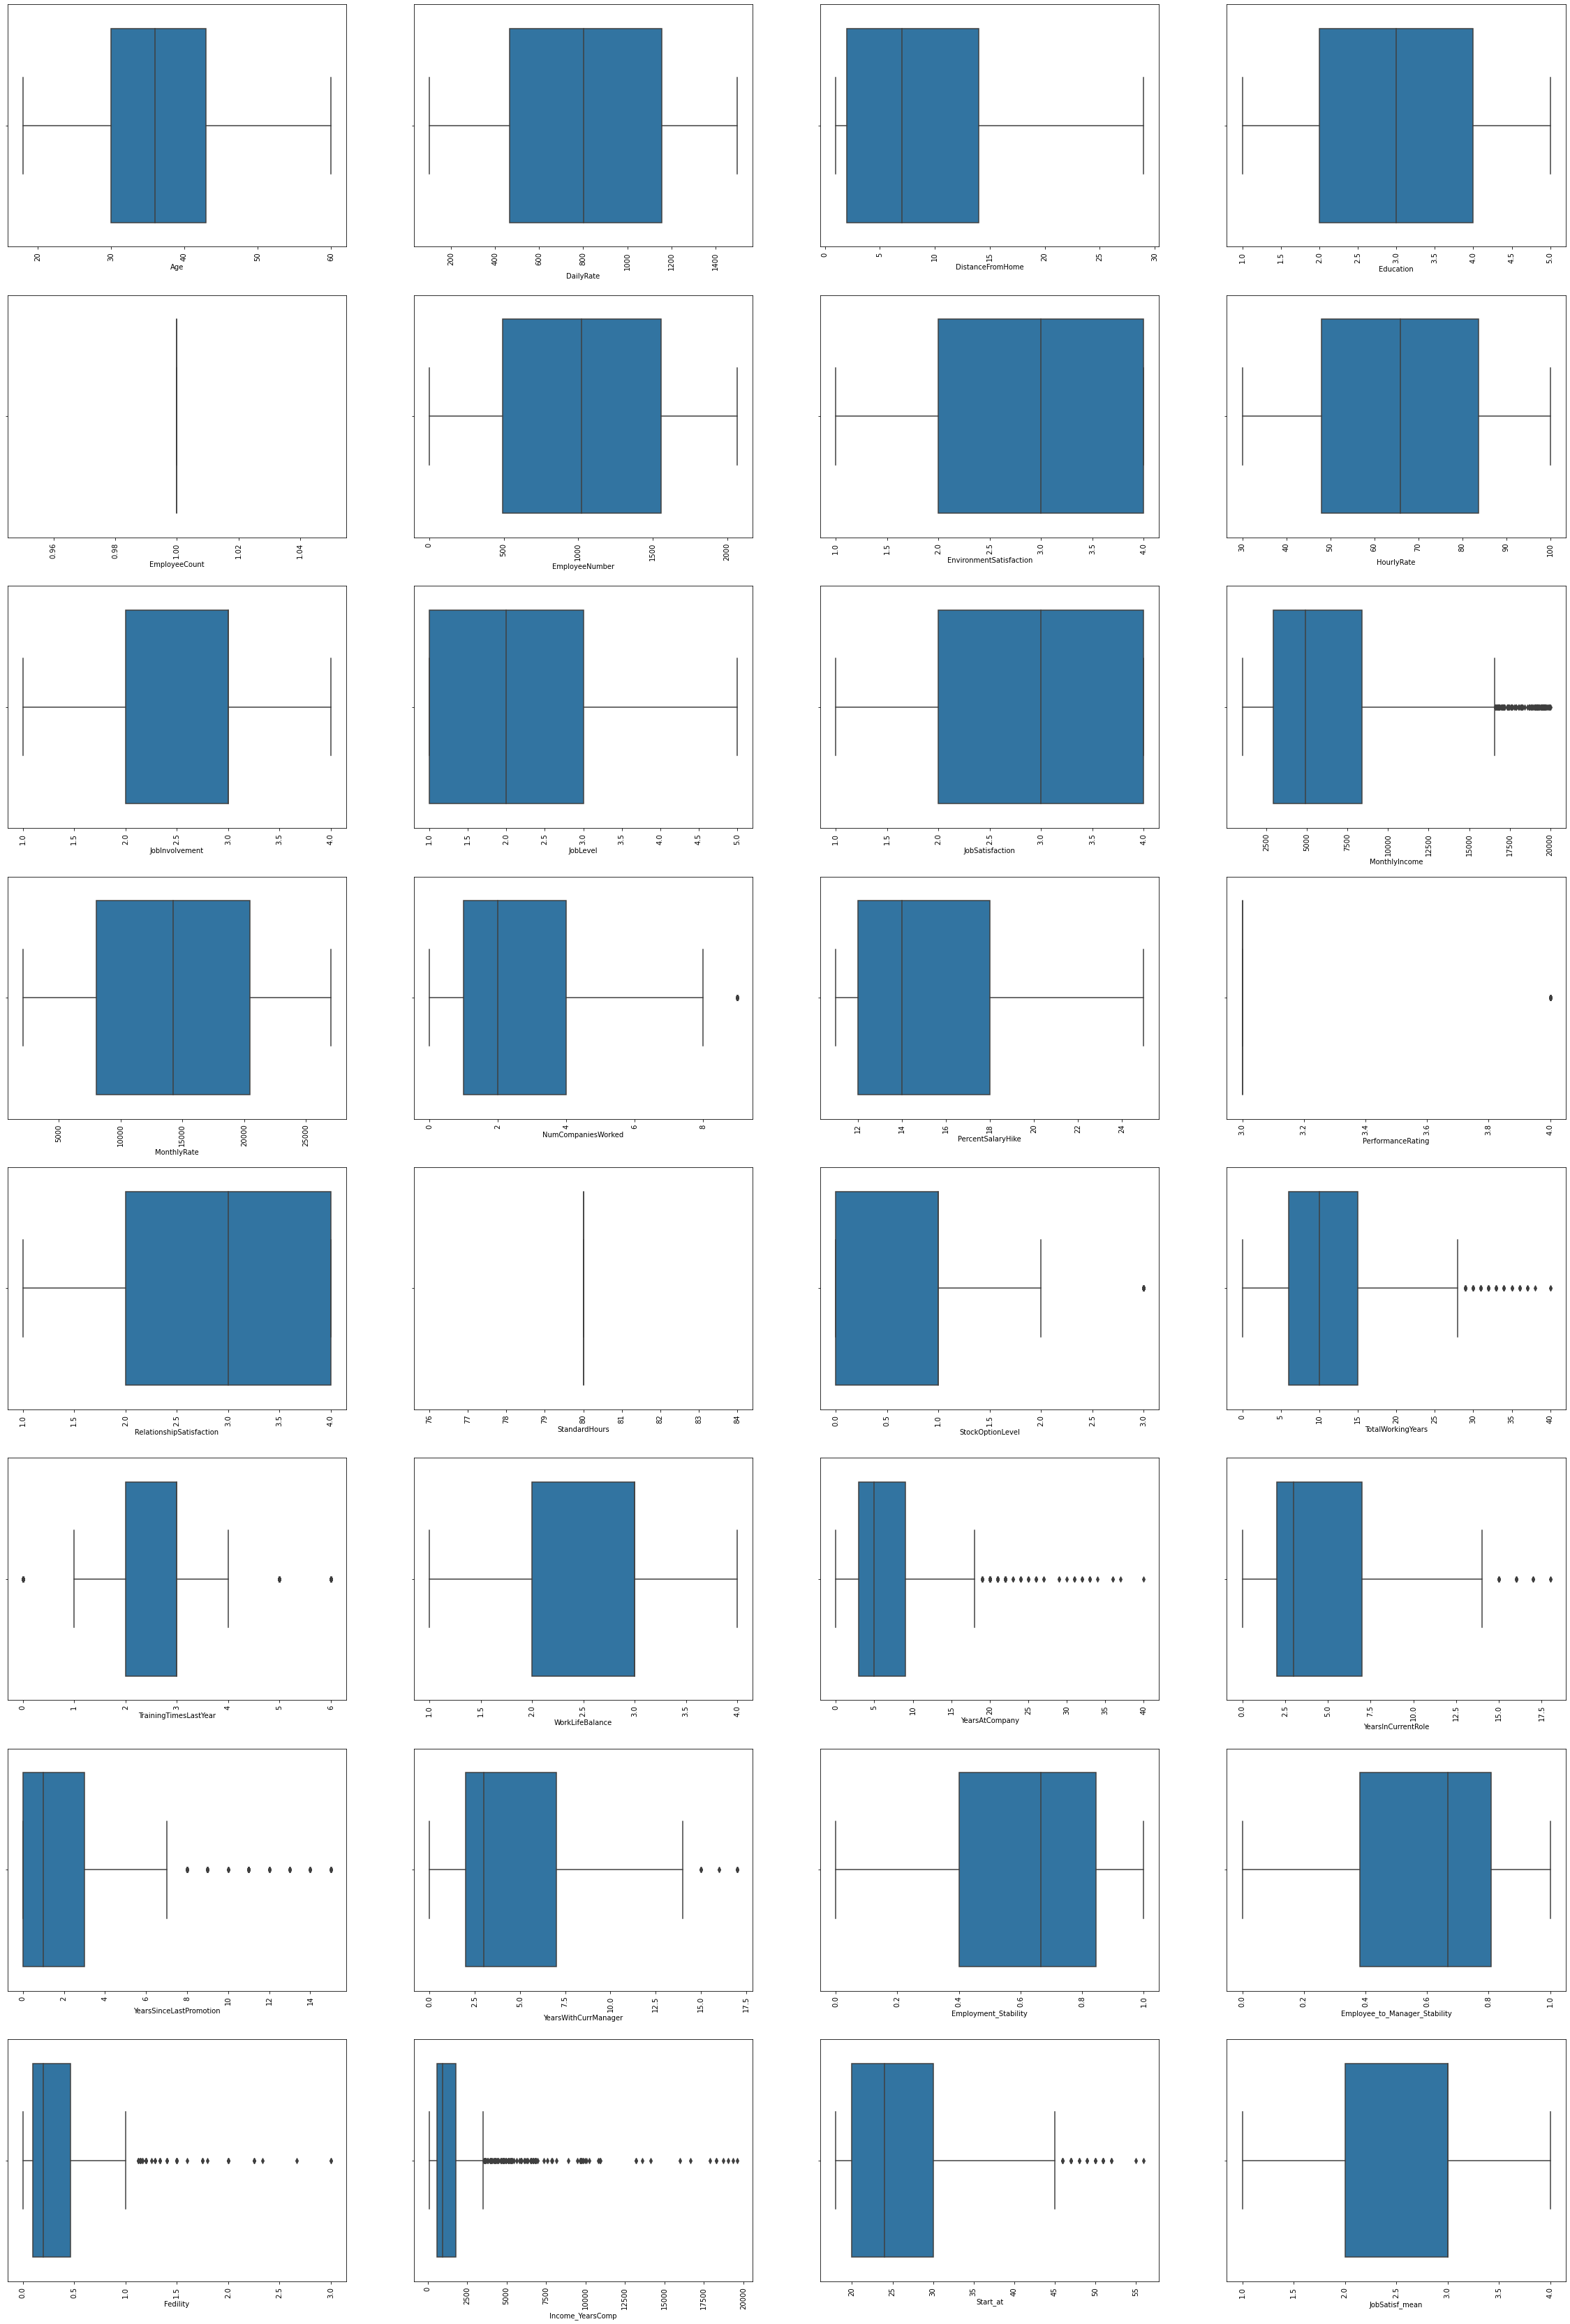

In [27]:
fig, ax=plt.subplots(8,4,figsize=(40,60))
for var,subplot in zip(nueric,ax.flatten()):
    sns.boxplot(master[var],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


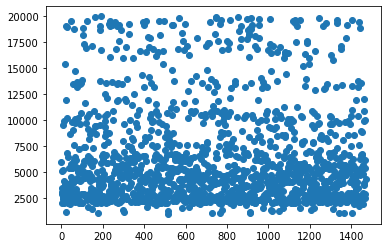

In [31]:
####GRUB TEST##
y=master.MonthlyIncome
x= np.arange(len(y))
plt.scatter(x,y)

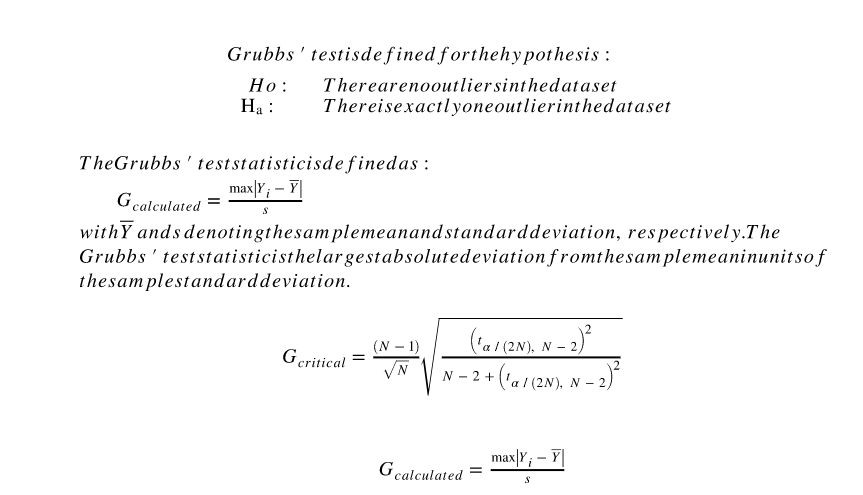

In [48]:
from PIL import Image
img=Image.open('Capture.PNG')
img

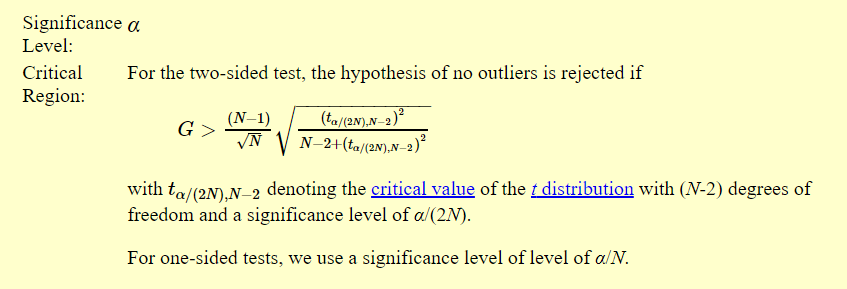

In [50]:
from PIL import Image
imgs=Image.open('Captures.PNG')
imgs

In [41]:
####CALCUALTION###
import scipy.stats as stats
avg_y = np.mean(y)
print (avg_y)
abs_val_minus_avg = abs(y - avg_y)
print (abs_val_minus_avg)
max_of_deviations = max(abs_val_minus_avg)
print ('Max Std: ',max_of_deviations)
s = np.std(y)
print ('Std.Dev: ',s)
Gcalculated = max_of_deviations/ s
print ('Gcc: ',Gcalculated)

6502.931292517007
0        509.931293
1       1372.931293
2       4412.931293
3       3593.931293
4       3034.931293
           ...     
1465    3931.931293
1466    3488.068707
1467     360.931293
1468    1112.931293
1469    2098.931293
Name: MonthlyIncome, Length: 1470, dtype: float64
Max Std:  13496.068707482993
Std.Dev:  4706.355164823004
Gcc:  2.8676264826669855


In [42]:
#CRITICAL VALUE #
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [43]:
Gcritical = calculate_critical_value(len(y), 0.05)

Grubbs Critical Value: 4.133386214427365


In [56]:
#Hypothesis  failed to Reject as Gcc is less than Grubb Critical Value

print('Grubbs Critical Value: ',Gcritical)
print ('Gcc: ',Gcalculated)

Grubbs Critical Value:  4.133386214427365
Gcc:  2.8676264826669855
